<a href="https://colab.research.google.com/github/Yuva486/CODSOFT/blob/main/CODSOFT_TASK_2_Movie_Rating_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>**Developer name : Yuva Sree Pandala**  
>**Batch : october-november**  
>**Domain : Data Science**  
>**Task : Movie Rating Prediction with Python**

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
movies = pd.read_csv('/content/IMDb Movies India.csv (1).zip', encoding='ISO-8859-1')
movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#Data Exploration & Pre Processing
movies.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [62]:
movies.shape

(15509, 10)

In [63]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [64]:
movies.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [65]:
# checking for missing values
movies.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [66]:
movies.isnull().mean()*100

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64

In [67]:
movies.dropna(inplace= True)

In [68]:
movies.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [69]:
movies['Votes']

1            8
3           35
5          827
6        1,086
8          326
         ...  
15493      408
15494    1,496
15503       44
15505      655
15508       20
Name: Votes, Length: 5659, dtype: object

In [70]:
# Converting this column to integer by removing the commas
movies['Votes'] = movies['Votes'].str.replace(',', '', regex=True).astype(int)

In [71]:
movies['Votes']

1           8
3          35
5         827
6        1086
8         326
         ... 
15493     408
15494    1496
15503      44
15505     655
15508      20
Name: Votes, Length: 5659, dtype: int64

In [72]:
movies.shape

(5659, 10)

In [73]:
# Removing Duplicates in the data
movies.drop_duplicates(inplace = True)

In [74]:
movies.shape

(5659, 10)

In [75]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 486.3+ KB


In [76]:
# Cleaning the Name column
movies['Name'] = movies['Name'].str.extract('([A-Za-z\s\'\-]+)')

In [77]:
movies['Name']

1                  Gadhvi 
3                   Yaaram
5        Aur Pyaar Ho Gaya
6                   Yahaan
8          A Question Mark
               ...        
15493               Zubaan
15494             Zubeidaa
15503      Zulm Ki Zanjeer
15505                Zulmi
15508         Zulm-O-Sitam
Name: Name, Length: 5659, dtype: object

In [78]:
# Cleaning the Year column now
movies['Year'] = movies['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [79]:
movies['Year']

1        2019
3        2019
5        1997
6        2005
8        2012
         ... 
15493    2015
15494    2001
15503    1989
15505    1999
15508    1998
Name: Year, Length: 5659, dtype: int64

In [80]:
# Convert the Duration column to numeric and replacing by min
movies['Duration'] = pd.to_numeric(movies['Duration'].str.replace(r' min', '', regex=True), errors='coerce')

In [81]:
movies['Duration']

1        109
3        110
5        147
6        142
8         82
        ... 
15493    115
15494    153
15503    125
15505    129
15508    130
Name: Duration, Length: 5659, dtype: int64

In [82]:
movies.describe()

,Year,Duration,Rating,Votes
count,5659.000000,5659.000000,5659.000000,5659.000000
mean,1996.247570,133.439124,5.898533,2697.649585
std,19.741839,25.319939,1.381165,13651.503584
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,119.000000,5.000000,30.000000
50%,2002.000000,135.000000,6.100000,131.000000
75%,2013.000000,150.000000,6.900000,922.500000
max,2021.000000,321.000000,10.000000,591417.000000


 **Data** **Visualization**

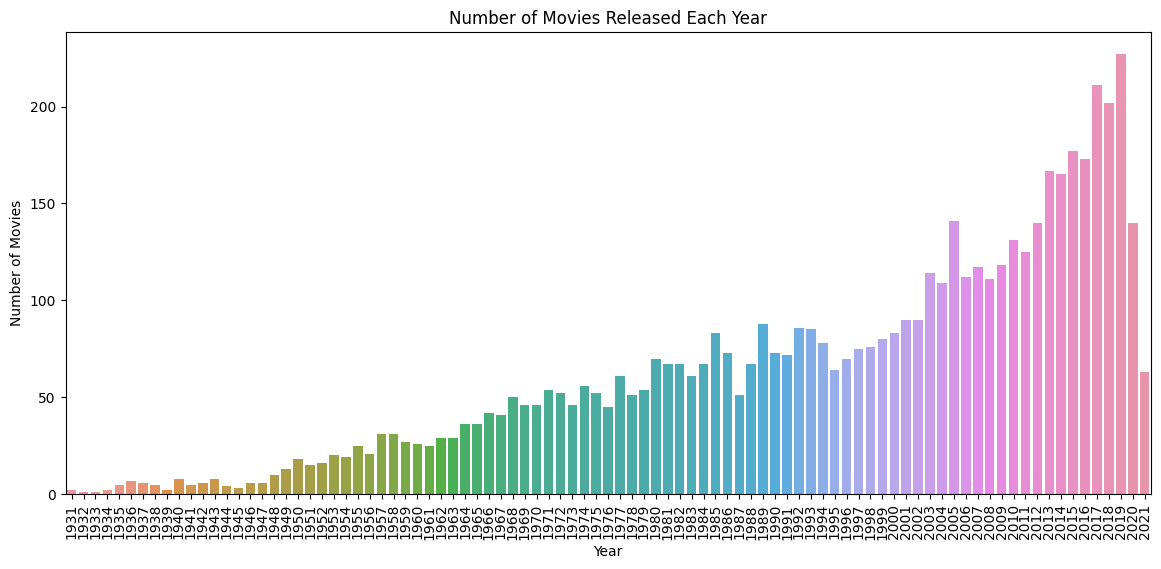

In [83]:
# 1. Movies Count By Year

plt.figure(figsize=(14, 6))
sns.countplot(data=movies, x='Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.show()

 **Movies** **Rating** **by** **Votes**

<ipython-input-84-8e591a91a552>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Rating', y ='Votes', data=movies, palette=custom_palette)


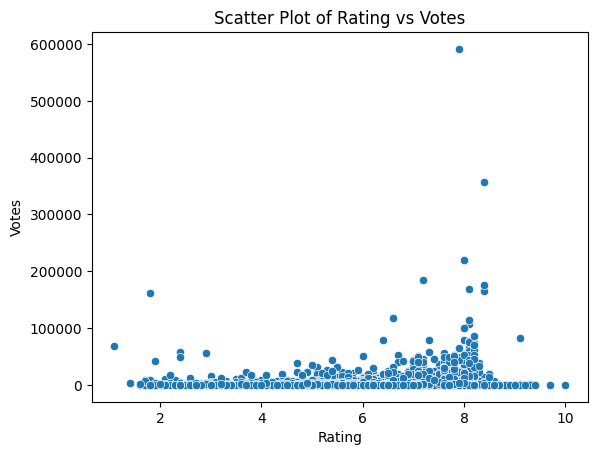

In [84]:
custom_palette ="Blues"
sns.scatterplot(x='Rating', y ='Votes', data=movies, palette=custom_palette)

plt.title("Scatter Plot of Rating vs Votes")

plt.show()

**Data** **Encoding**

In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
# Converting text data to numeric form
categorical_variables = ['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']
for feature in categorical_variables:
    le = LabelEncoder()
    movies[feature] = le.fit_transform(movies[feature])

**Defining** **Features** **and** **Target** **variables**

In [87]:
# Defining Features and and Target variables
X = movies[['Genre', 'Director', 'Actor 1','Actor 2','Actor 3']]
y = movies['Rating']

In [88]:
X

,Genre,Director,Actor 1,Actor 2,Actor 3
1,229,629,1352,2272,319
3,184,1335,1198,719,2148
5,157,1530,378,75,2045
6,289,2044,692,1112,2524
8,320,135,1934,1175,1013
...,...,...,...,...,...
15493,229,1223,1861,1801,1615
15494,133,2059,763,1619,1184
15503,28,1793,406,754,1685
15505,38,1025,112,2164,314


In [89]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

 **Data** **Standardisation**

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()

In [92]:
features_scaled = scaler.fit_transform(X)

In [93]:
X= features_scaled
y = movies['Rating']

In [94]:
X

array([[ 0.52931791, -0.84886812,  0.6816723 ,  1.63359215, -1.32934107],
       [ 0.11341838,  0.17933035,  0.40902916, -0.69552904,  1.21099562],
       [-0.13612133,  0.46332284, -1.04270705, -1.66137196,  1.06793675],
       ...,
       [-1.32836665,  0.84634861, -0.99313557, -0.64303758,  0.56792515],
       [-1.23594453, -0.2721449 , -1.51363611,  1.47161849, -1.33628568],
       [-1.23594453, -0.46147323, -0.88337015, -0.64453734, -1.35156381]])

In [95]:
y

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5659, dtype: float64

In [96]:
# Spliting the Data in Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
print(X.shape, X_train.shape, X_test.shape)

(5659, 5) (4527, 5) (1132, 5)


**Model Selection** **and** **Training**

In [98]:
# Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [99]:
X_test=np.array(X_test)

**Predictions and Model Evaluation**

In [100]:
# We will use test set to make predictions
y_pred = model.predict(X_test)

In [101]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 1.82
R-squared: 0.01


In [102]:
model.predict(X_test)

array([5.65833159, 6.01425693, 5.91972685, ..., 5.73063614, 5.82123948,
       5.99215887])

In [103]:
print(y_test)

10971    6.0
14052    2.4
10002    3.8
3970     3.8
8840     7.2
        ... 
13713    6.7
2820     6.8
1810     4.8
13679    6.7
1649     6.6
Name: Rating, Length: 1132, dtype: float64
